In [1]:
!pip install tpot
from tpot import TPOTRegressor
import pandas as pd

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.2/87.2 kB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.8/139.8 kB 11.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for stopit: filename=stopit-1.1.2-py3-none-any.whl size=11954 sha256=9613458d797a1acd2c951528a562607bc14ec970a1ab2e2f1cbf63dc200d0874
  Stored in directory: /root/.cache/pip/wheels/48/8c/93/3afb1916772591fe6bcc25cdf8b1c5bdc362f0ec8e2f0fd413
Successfully built stopit


In [2]:
#importing data from a local CSV file
from google.colab import files
uploaded = files.upload()

Saving 500s90f3t2g0.01py1-y1e2-y1e3.csv to 500s90f3t2g0.01py1-y1e2-y1e3.csv


In [3]:
df = pd.read_csv("500s90f3t2g0.01py1-y1e2-y1e3.csv")
df.head()
y_col = [
    'Y1',
    'Y2',
    'Y3',
#    'Y4',
#    'Y5',
#    'Y6'
 ]
y = df[y_col]
y.head()
X = df[df.columns.drop(y)]
X.head()


,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X81,X82,X83,X84,X85,X86,X87,X88,X89,X90
0,0.071902,0.931855,0.086871,0.500147,0.560689,0.810765,0.697662,0.469007,0.158662,0.012468,...,0.404703,0.363686,0.326017,0.926856,0.287460,0.199443,0.746749,0.704873,0.682031,0.448516
1,0.603154,0.374785,0.560634,0.286639,0.087392,0.314301,0.190164,0.959350,0.115710,0.053019,...,0.048429,0.867535,0.230268,0.899691,0.584341,0.222777,0.399910,0.723618,0.241882,0.189164
2,0.548388,0.010886,0.926752,0.164227,0.908314,0.183669,0.477744,0.843262,0.716677,0.408403,...,0.853530,0.085783,0.293220,0.536565,0.875848,0.685304,0.627132,0.334883,0.230083,0.053940
3,0.816049,0.893638,0.838058,0.485870,0.464822,0.957664,0.747288,0.627040,0.857547,0.321617,...,0.675485,0.759796,0.284942,0.403809,0.218329,0.076658,0.783356,0.058369,0.152175,0.439696
4,0.351637,0.908709,0.723942,0.522291,0.115966,0.000000,0.966387,0.351567,0.650720,0.176930,...,0.972074,0.536275,0.725115,0.247351,0.081460,0.662939,0.899302,0.232380,0.194709,0.759075


In [4]:
y.head()

,Y1,Y2,Y3
0,0.494452,0.000002,0.481012
1,0.098690,0.608521,0.234651
2,0.599863,0.043988,0.485800
3,0.553887,0.014144,0.481885
4,0.844868,0.481102,0.654198


In [6]:
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X_train, X_test, y_train, y_test = train_test_split( 
                        X, y, test_size = 0.20, random_state = 39)
from sklearn.multioutput import MultiOutputRegressor
rfg = MultiOutputRegressor(RandomForestRegressor(n_estimators=100,criterion='squared_error'))

#from sklearn.decomposition import PCA, KernelPCA
#pca = KernelPCA (kernel='rbf', fit_inverse_transform=True, random_state=39)
# transform and fit the feature of the training set
#X_train = pca.fit_transform(X_train)
# transform features of the test set
#X_test = pca.transform(X_test)

rfg.fit(X_train, y_train)
y_pred = rfg.predict(X_test)
rfg.score(X_test, y_test)

0.06418139421063788

In [7]:
import math
from sklearn.metrics import  mean_squared_error as morrfr_rmse
from sklearn.metrics import mean_absolute_error as morrfr_mae
morrfr_rmse1=math.sqrt(morrfr_rmse(y_test, y_pred))
print('RMSE for morrfr is',morrfr_rmse1)

morrfr_mae1=morrfr_mae(y_test, y_pred)
print('MAE for morrfr is',morrfr_mae1)

RMSE for morrfr is 0.13577619738913058
MAE for morrfr is 0.0917520043845767


In [8]:
#Running TPOT-MOR using MultiOutputRegressor from SK-Learn
import numpy as np
from tpot import decorators
decorators.MAX_EVAL_SECS = 240
tpotreg = MultiOutputRegressor(TPOTRegressor(warm_start=True ,generations=5, population_size=50, verbosity=2, random_state=39,n_jobs=1, max_time_mins=None, max_eval_time_mins=5,cv=10))
tpotreg.fit(X_train,y_train)
tpotreg.score(X_test, y_test)


import math
from sklearn.metrics import  mean_squared_error as tpotmo_mse
from sklearn.metrics import mean_absolute_error as tpotmo_mae
tpotmo_rmse1=math.sqrt(tpotmo_mse(y_test, y_pred))
print('RMSE for TPOT-MO is',tpotmo_rmse1)

tpotmo_mae1=tpotmo_mae(y_test, y_pred)
print('MAE for TPOT-MO is',tpotmo_mae1)
tpotreg.score(X_test, y_test)

Optimization Progress:   0%|          | 0/300 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -0.014656965130100761

Generation 2 - Current best internal CV score: -0.01464221155818638

Generation 3 - Current best internal CV score: -0.01464221155818638

Generation 4 - Current best internal CV score: -0.01464221155818638

Generation 5 - Current best internal CV score: -0.01464221155818638

Best pipeline: ElasticNetCV(MaxAbsScaler(input_matrix), l1_ratio=1.0, tol=1e-05)


Optimization Progress:   0%|          | 0/300 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -0.026456100798181954

Generation 2 - Current best internal CV score: -0.026456100798181954

Generation 3 - Current best internal CV score: -0.026456100798181954

Generation 4 - Current best internal CV score: -0.026456100798181954

Generation 5 - Current best internal CV score: -0.02643160692008275

Best pipeline: KNeighborsRegressor(RidgeCV(input_matrix), n_neighbors=20, p=1, weights=distance)


Optimization Progress:   0%|          | 0/300 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -0.004833535194244873

Generation 2 - Current best internal CV score: -0.004736184775291674

Generation 3 - Current best internal CV score: -0.004736184775291674

Generation 4 - Current best internal CV score: -0.004736184775291674

Generation 5 - Current best internal CV score: -0.004736184775291674

Best pipeline: RandomForestRegressor(GradientBoostingRegressor(CombineDFs(PCA(input_matrix, iterated_power=6, svd_solver=randomized), input_matrix), alpha=0.8, learning_rate=0.1, loss=huber, max_depth=4, max_features=1.0, min_samples_leaf=17, min_samples_split=5, n_estimators=100, subsample=0.7000000000000001), bootstrap=True, max_features=0.9500000000000001, min_samples_leaf=18, min_samples_split=7, n_estimators=100)
RMSE for TPOT-MO is 0.13577619738913058
MAE for TPOT-MO is 0.0917520043845767


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RidgeCV was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RidgeCV was fitted with feature names
  warnings.warn(


0.3112359584475784

In [ ]:
#Running TPOT-MOR using MultiOutputRegressor from SK-Learn
import numpy as np
from tpot import decorators
decorators.MAX_EVAL_SECS = 240
tpotreg = MultiOutputRegressor(TPOTRegressor(warm_start=True ,generations=5, population_size=50, verbosity=2, random_state=39,n_jobs=1, max_time_mins=None, max_eval_time_mins=5,cv=10))
tpotreg.fit(X_train,y_train)
tpotreg.score(X_test, y_test)


import math
from sklearn.metrics import  mean_squared_error as tpotmo_mse
from sklearn.metrics import mean_absolute_error as tpotmo_mae
tpotmo_rmse1=math.sqrt(tpotmo_mse(y_test, y_pred))
print('RMSE for TPOT-MO is',tpotmo_rmse1)

tpotmo_mae1=tpotmo_mae(y_test, y_pred)
print('MAE for TPOT-MO is',tpotmo_mae1)

Optimization Progress:   0%|          | 0/300 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -0.0011732421945276788

Generation 2 - Current best internal CV score: -0.0011732421945276788

Generation 3 - Current best internal CV score: -0.0011732421945276788

Generation 4 - Current best internal CV score: -0.0010989302062958338

Generation 5 - Current best internal CV score: -0.0010989302062958338

Best pipeline: ElasticNetCV(LinearSVR(input_matrix, C=5.0, dual=True, epsilon=0.001, loss=epsilon_insensitive, tol=1e-05), l1_ratio=0.8, tol=1e-05)


Optimization Progress:   0%|          | 0/300 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -0.01684960553565585

Generation 2 - Current best internal CV score: -0.01684960553565585

Generation 3 - Current best internal CV score: -0.01651313436137837

Generation 4 - Current best internal CV score: -0.01651313436137837

Generation 5 - Current best internal CV score: -0.01568965000391372

Best pipeline: DecisionTreeRegressor(ExtraTreesRegressor(input_matrix, bootstrap=False, max_features=0.6500000000000001, min_samples_leaf=6, min_samples_split=7, n_estimators=100), max_depth=7, min_samples_leaf=11, min_samples_split=6)


Optimization Progress:   0%|          | 0/300 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -0.031113546002805165

Generation 2 - Current best internal CV score: -0.030942343166400023

Generation 3 - Current best internal CV score: -0.030942343166400023

Generation 4 - Current best internal CV score: -0.030942343166400023

Generation 5 - Current best internal CV score: -0.030942343166400023

Best pipeline: KNeighborsRegressor(CombineDFs(input_matrix, input_matrix), n_neighbors=67, p=1, weights=distance)
RMSE for TPOT-MO is 0.14840043293394242
MAE for TPOT-MO is 0.10459505391574604


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearSVR was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  warnings.warn(


In [ ]:
tpotreg.score(X_test, y_test)

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearSVR was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  warnings.warn(


0.47034972401879455

In [ ]:
from sklearn.svm import LinearSVR
from sklearn.multioutput import MultiOutputRegressor
#rfg1 = MultiOutputRegressor(LinearSVR(random_state=39,dual = True,max_iter=1000000))
rfg1 = MultiOutputRegressor(LinearSVR(tol=0.0001, C=1.0,loss='squared_epsilon_insensitive',intercept_scaling=1.0,fit_intercept=True,epsilon=0, random_state=39,dual = True,max_iter=1000000))
rfg1.fit(X_train, y_train)
y_pred1 = rfg1.predict(X_test)
rfg1.score(X_test, y_test)

0.20632689671752372

In [ ]:
import math
from sklearn.metrics import mean_absolute_error as morlsvr_mae2
from sklearn.metrics import mean_squared_error as morlsvr_rmse2
morlsvr_rmse1=math.sqrt(morlsvr_rmse2(y_test, y_pred1))
print('RMSE for morlsvr is',morlsvr_rmse1)
morlsvr_mae1=morlsvr_mae2(y_test, y_pred1)
print('MAE for morlsvr is',morlsvr_mae1)

RMSE for morlsvr is 0.15562123884272971
MAE for morlsvr is 0.10182259615154336


In [ ]:
class MultiOutputTP(object):
    def __init__(self, *args, **kwargs):
        self.args = args
        self.kwargs = kwargs
        
    def fit(self, X, y):
        X, y = map(np.atleast_2d, (X, y))
        assert X.shape[0] == y.shape[0]
        Ny = y.shape[1]
        
        self.clfs = []
        for i in range(Ny):
            #clf = GradientBoostingRegressor(**self.kwargs)
            #clf = LinearSVR(max_iter=10000000)
            #clf = LinearSVR(max_iter=500000, **self.kwargs)
            #clf = ExtraTreesRegressor(*self.args, **self.kwargs)
            #clf = RandomForestRegressor(*self.args)
            #clf = TPOTRegressor(*self.args, **self.kwargs)
            clf = TPOTRegressor(generations=5, population_size=50, verbosity=2, random_state=39,n_jobs=1, max_time_mins=None, max_eval_time_mins=5,cv=10)
            Xi = np.hstack([X, y[:, :i]])
            yi = y[:, i]
            self.clfs.append(clf.fit(Xi, yi))
            
        return self
        
    def predict(self, X):
        y = np.empty([X.shape[0], len(self.clfs)])
        for i, clf in enumerate(self.clfs):
            y[:, i] = clf.predict(np.hstack([X, y[:, :i]]))
        return y

In [ ]:
import numpy as np
from tpot import decorators
decorators.MAX_EVAL_SECS = 240

from sklearn.decomposition import PCA, KernelPCA
pca = KernelPCA (kernel='rbf', fit_inverse_transform=True, random_state=39)
# transform and fit the feature of the training set
X_train2 = pca.fit_transform(X_train)
# transform features of the test set
X_test2 = pca.transform(X_test)

clf2 = MultiOutputTP(50).fit(X_train2, y_train)
Ypred2 = clf2.predict(X_test2)

Optimization Progress:   0%|          | 0/300 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -0.0015130960209311759

Generation 2 - Current best internal CV score: -0.0015130960209311759

Generation 3 - Current best internal CV score: -0.0015130960209311759

Generation 4 - Current best internal CV score: -0.0015130960209311759

Generation 5 - Current best internal CV score: -0.001103061633208792

Best pipeline: ElasticNetCV(LinearSVR(input_matrix, C=1.0, dual=True, epsilon=0.001, loss=epsilon_insensitive, tol=0.0001), l1_ratio=0.30000000000000004, tol=0.0001)


Optimization Progress:   0%|          | 0/300 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -0.023585619612522042

Generation 2 - Current best internal CV score: -0.023585619612522042

Generation 3 - Current best internal CV score: -0.023501407634911244

Generation 4 - Current best internal CV score: -0.023501407634911244

Generation 5 - Current best internal CV score: -0.023501407634911244

Best pipeline: ElasticNetCV(RobustScaler(input_matrix), l1_ratio=0.4, tol=0.0001)


Optimization Progress:   0%|          | 0/300 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -0.03070469601463178

Generation 2 - Current best internal CV score: -0.03070469601463178

Generation 3 - Current best internal CV score: -0.03070469601463178

Generation 4 - Current best internal CV score: -0.03070469601463178

Generation 5 - Current best internal CV score: -0.03070469601463178

Best pipeline: ElasticNetCV(MinMaxScaler(input_matrix), l1_ratio=0.4, tol=0.0001)


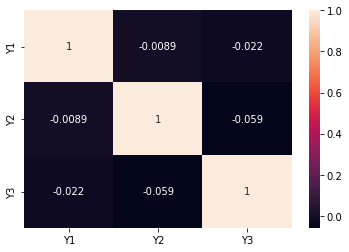

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
# taking all rows but only 6 columns
df_small = y_test.iloc[:,:3]
correlation_mat = df_small.corr(method='pearson')
sns.heatmap(correlation_mat, annot = True)
plt.show()

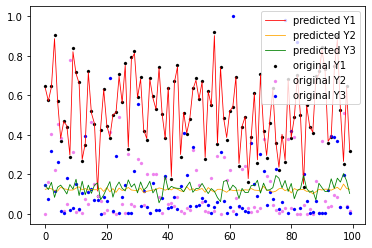

In [ ]:
X_ax = range(len(X_test))
#plt.scatter(y_test[:, 0],y_test[:, 1],y_test[:, 2], s=5, color="blue", label="original")
plt.scatter(X_ax, y_test.iloc[:,0], color="black", s=10,linewidth=0.1,label="original Y1")
plt.scatter(X_ax, y_test.iloc[:,1], color="violet", s=10,linewidth=0.1,label="original Y2")
plt.scatter(X_ax, y_test.iloc[:,2], color="blue", s=10,linewidth=0.1,label="original Y3")
#plt.scatter(X_ax, y_test.iloc[:,3], color="orange", s=10,linewidth=0.1,label="original Y4")
#plt.scatter(X_ax, y_test.iloc[:,4], color="gray", s=10,linewidth=0.1,label="original Y5")
#plt.scatter(X_ax, y_test.iloc[:,5], color="maroon", s=10,linewidth=0.1,label="original Y6")


plt.plot(X_ax, Ypred2[:,0], lw=0.8, color="red", label="predicted Y1")
plt.plot(X_ax, Ypred2[:,1], lw=0.8, color="orange", label="predicted Y2")
plt.plot(X_ax, Ypred2[:,2], lw=0.8, color="green", label="predicted Y3")
#plt.plot(X_ax, Ypred2[:,2], lw=0.8, color="lime", label="predicted Y4")
#plt.plot(X_ax, Ypred2[:,2], lw=0.8, color="navy", label="predicted Y5")
#plt.plot(X_ax, Ypred2[:,2], lw=0.8, color="aqua", label="predicted Y6")
plt.legend()
plt.show()

In [ ]:
rmse = np.sqrt(((Ypred2 - y_test) ** 2).mean())
#rmse = sqrt(mean_squared_error(y_test, Ypred2))
#rmse
print("rmse: ",rmse)

from statistics import mean
arrmse = mean(rmse)
print("arrmse: ",arrmse)
from sklearn.metrics import mean_absolute_error as mae
mae = mae(y_test, Ypred2)
print("Mean absolute error : ",mae)
from sklearn.metrics import r2_score
r2 = r2_score(y_test, Ypred2)
print("R2: ",r2)
from sklearn.metrics import mean_squared_error
from math import sqrt
RMSE = sqrt(mean_squared_error(y_test, Ypred2))
#RMSE2 = sqrt(mean_squared_error(Ytest, Ypred2))

print('RMSE for Ypred2 is',RMSE)
#print('RMSE for Ypred2 is',RMSE2)

rmse:  Y1    0.009290
Y2    0.151267
Y3    0.193112
dtype: float64
arrmse:  0.11788932604098673
Mean absolute error :  0.08453297528929586
R2:  0.34529165825935654
RMSE for Ypred2 is 0.14172735528409727
